# Scalabilty: Convergence

Understand the ability of the algorithm to converge onto a solution, as the number of control point increase. Given that there is some inherent randomness in the approach, this is evaluated across random seeds. 

In [1]:
import os
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pystorms.scenarios import gamma

## Extract simulation metrics

In [ ]:
def extract_performance(path=".",
                        seed=None,
                        controller=None):
    
    metrics = {"time": [],
               "performance": [],
               "control_points": [],
               "iterations": [],
               'completed': [],
               'seed':[]}
    
    if controller==None:
        if seed is None:
            reports = glob.glob(path + "/*_Scalability_report.txt")
        else:
            reports = glob.glob(path + str(seed) +"_*_Scalability_report.txt")
    else:
        if seed is None:
            reports = glob.glob(path + "/*?[_" + str(controller) + "_]_Scalability_report.txt")
        else:
            reports = glob.glob(path + str(seed) +"_" + str(controller) + "_Scalability_report.txt")
            
            
    # parse them to find the compute time and performance for each controller
    for file in reports:
        if seed is None:
            metrics["seed"].append(int(re.search(r"\d+\.?\d*", file).__getitem__(0)))
        
        metrics["control_points"].append(int(re.findall(r"\_(\d+)\_", file)[0]))
            
        # open the file
        with open(file, "r") as f:
            content = f.readlines()
        for line in content:
            # if line has optimization time, extract time and append it to array
            if bool(re.match(r"Optimization time:", line)):
                metrics["time"].append(
                    float(re.search(r"\d+\.?\d*", line).__getitem__(0)) / 60.0
                )
            # if line has performance
            if bool(re.match(r"Value at minimum:", line)):
                metrics["performance"].append(
                    float(re.search(r"\d+\.?\d*", line).__getitem__(0))
                )
                        # if line has performance
            if bool(re.match(r"Optimization completed:", line)):
                metrics["iterations"].append(
                    float(re.search(r"\d+\.?\d*", line).__getitem__(0))
                )
                idic_yes = re.search(r'\bYES\b', line)
                if (idic_yes != None):
                    metrics["completed"].append(1)
                else:
                    metrics["completed"].append(0)
                    
    return metrics

In [10]:
data ={}
for i in range(1, 12):
    data[str(i)] = pd.DataFrame(extract_performance("./simulation_data/", controller=i))

## Analyze Convergencce Metrics

1. Heatmap : Average time till covergence
    * x - number of control points
    * z - time in min 

In [18]:
# Get time till simulation end for each control point
data_str = pd.DataFrame(extract_performance("./simulation_data/"))

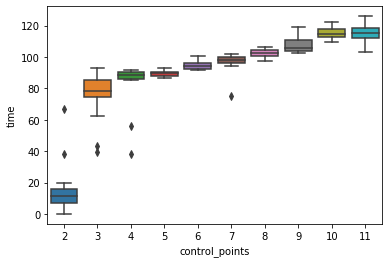

In [20]:
sns.boxplot(x=data_str['control_points'], y=data_str['time'])

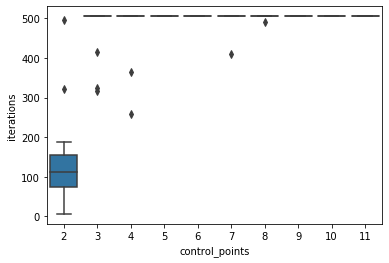

In [22]:
sns.boxplot(x=data_str['control_points'], y=data_str['iterations'])